<a href="https://colab.research.google.com/github/Susanna-Salata/Sigma-University/blob/main/Sigma_HW_5_2_Susanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Виконала: Сусанна Салата

In [1]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.24.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import pip
from ortools.sat.python import cp_model

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
def cp_model_solver():
    # Оптимізаційна математична модель
    model = cp_model.CpModel()
    var_upper_bound = max(40, 10, 18, 16)
    x = model.NewIntVar(0, var_upper_bound, 'x')
    y = model.NewIntVar(0, var_upper_bound, 'y')

    # Обмеження
    model.Add(3 * x + 5 * y <= 40)
    model.Add(x + 5 * y <= 10)
    model.Add(5 * x <= 18)
    model.Add(4 * y <= 16)

    # Цільова функція ефективності
    efficiency_function = - 2 * x - 2 * y

    model.Minimize(efficiency_function) # Максимізоція цільової функції
    # model.Minimize(efficiency_function)  # Мінімізація цільової функції

    # Вирішувач
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL:
        print()
        print('Minimum of objective function: %i' % solver.ObjectiveValue())
        xout = solver.Value(x)
        yout = solver.Value(y)
        print('x= ', xout)
        print('y= ', yout)

        print('---------------Оптимальна-ефективність---------------------')
        MinimusOPT = - 2 * xout - 2 * yout
        print('MinimusOPT= ', MinimusOPT)
        # -------------- Аналіз отриманого рішення ---------------------------
        '''
        ---------------Максимум-Максиморум для заданих обмежень ------------
        MaxMaxX:  1.5x+2y=12, y=0, xmax=8    (1 нерівність)
        MaxMaxY: 1.5x+2y=12, x=0, ymaх=6 (2 нерівність)
        '''
        print('---------------- Максимум-Максиморум ------------------------')
        xmax = 8
        ymax = 6
        MaximusP = -2 * xmax - 2 * ymax
        print('MaximusP= ', MaximusP)

        '''
        --------------- Мінімум-Мініморум для заданих ообмежень -----------
        MinMinX:  4x=16, y=0, xmin=4    (1 нерівність)
        MinMinY:  x+2y=8, x=0, ymin=4    (2 нерівність)

        '''
        xmin = 4
        ymin = 4

        print('---------------- Мінімум-Мініморум ------------------------')
        MinimusM = -2 * xmin - 2 * ymin
        print(' MinimusM= ', MinimusM)

    return



In [15]:
def plot_solver():
    # -------- Графічна інтерпретація рішення "точкове" ----------
    fig = plt.figure()
    plt3d = fig.add_subplot(projection='3d')
    # ------------------ оптималье рішення-------------------------
    plt3d.scatter(4, 2, color='green')
    # ------------------ максимальне рішення-----------------------
    plt3d.scatter(8, 6, color='blue')
    # ------------------ мінімальне рішення -----------------------
    plt3d.scatter(4, 4, color='red')
    plt.show()

    # -------- Графічна інтерпретація рішення "площинне" ----------
    x1, y1 = np.meshgrid(range(-10, 30), range(-10, 30))
    z1 = (2 * x1 + 2 * y1 + 0) * (-1.0 / 3)
    z2 = (2 * x1 + 7 * y1 - 50) * (-3.0 / 3)
    z3 = (3 * x1 - 5 * y1 - 45) * (-7.0 / 3)
    z4 = (5 * x1 + 2 * y1 - 37) * (+6.0 / 3)
    fig = plt.figure()
    plt3d = fig.add_subplot(projection='3d')
    plt3d.plot_surface(x1, y1, z1, alpha=0.5)
    plt3d.plot_surface(x1, y1, z2, alpha=0.7)
    plt3d.plot_surface(x1, y1, z3, alpha=0.8)
    plt3d.plot_surface(x1, y1, z4, alpha=0.9)
    # ------------------ оптималье рішення-------------------------
    plt3d.scatter(4, 2, color='green')
    # ------------------ максимальне рішення-----------------------
    plt3d.scatter(8, 6, color='blue')
    # ------------------ мінімальне рішення -----------------------
    plt3d.scatter(4, 4, color='red')
    plt.show()

    return


Minimum of objective function: -8
x=  3
y=  1
---------------Оптимальна-ефективність---------------------
MinimusOPT=  -8
---------------- Максимум-Максиморум ------------------------
MaximusP=  -28
---------------- Мінімум-Мініморум ------------------------
 MinimusM=  -16


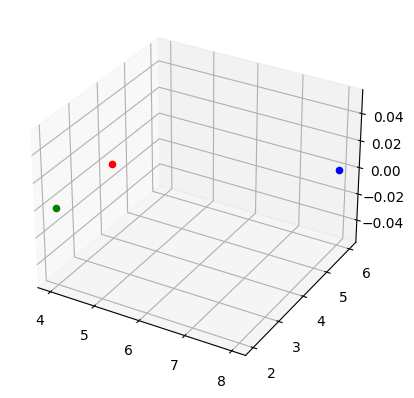

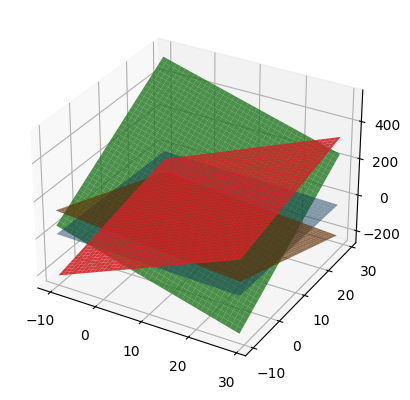

In [16]:
# ----------------------- головні виклики -------------------------

cp_model_solver()
plot_solver()
